<a href="https://colab.research.google.com/github/tewei0328/pbl-book/blob/master/tensorflow_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow Linear regression
https://ithelp.ithome.com.tw/articles/10218584

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
tf.__version__

'2.3.0'

In [ ]:
# Parameters.
learning_rate = 0.1
training_steps = 1000
display_step = 100
n_samples = 50

In [ ]:
X = np.random.rand(n_samples).astype(np.float32)
Y = X * 10 + 5

In [ ]:
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.zeros([1]))

In [ ]:
# Linear regression (Wx + b).
def linear_regression(x):
    return W * x + b

# Mean square error.
def mean_square(y_pred, y_true):
    return tf.reduce_sum(tf.pow(y_pred-y_true, 2)) / ( n_samples)

In [ ]:
# Stochastic Gradient Descent Optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

In [ ]:
# Optimization process. 
def run_optimization():
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)

    # Compute gradients.
    gradients = g.gradient(loss, [W, b])
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [ ]:
# Run training for the given number of steps.
for step in range(1, training_steps + 1):
    # Run the optimization to update W and b values.
    run_optimization()
    
    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

step: 100, loss: 0.099703, W: 8.985264, b: 5.606956
step: 200, loss: 0.005636, W: 9.758749, b: 5.144302
step: 300, loss: 0.000319, W: 9.942644, b: 5.034307
step: 400, loss: 0.000018, W: 9.986362, b: 5.008157
step: 500, loss: 0.000001, W: 9.996759, b: 5.001938
step: 600, loss: 0.000000, W: 9.999229, b: 5.000461
step: 700, loss: 0.000000, W: 9.999815, b: 5.000111
step: 800, loss: 0.000000, W: 9.999955, b: 5.000029
step: 900, loss: 0.000000, W: 9.999969, b: 5.000018
step: 1000, loss: 0.000000, W: 9.999969, b: 5.000018


In [ ]:
import matplotlib.pyplot as plt

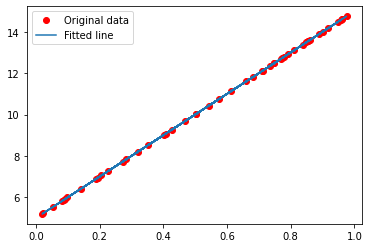

In [ ]:
# Graphic display
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()